# MUT19 TOTW Analysis
### Jan 4, 2019
- Scraping using BeautifulSoup and requests
- Looking at the number of elite and gold TOTW Players compared with the respective team records

In [1]:
%matplotlib inline
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import seaborn as sns
import urllib
import pandas as pd
import requests
import warnings; warnings.simplefilter('ignore')  
import time
import re
import os

### Helper Functions

In [2]:
# 
def get_player(player_raw):
    try:
        player_team = str(player_raw.find('span', class_='team-logo')).split(' ')[2].split('"')[0]
    except:
        player_team = '-'
    try:
        player_name = player_raw.find('a').contents[0].strip('\n').lstrip().split('\n')[0]
        print(player_name)
    except:
        player_name = '-'
    try:
        price_link = str(player_raw.find('a', class_='player-price tip')).split('"')[3]
    except:
        price_link = '-'
    try:
        ovr = player_raw.find('td', class_='col-overall').contents[0]
    except: 
        ovr = '-'
    try:
        pos = player_raw.find('td', class_='col-position').contents[0]
    except:
        pos = '-'
    
    return {'name': player_name,
            'team': player_team,
            'ovr': ovr,
            'pos': pos,
            'price_link': price_link}

# 
def list_to_df(players):
    df = pd.DataFrame(players)
    df = df[ df['name']!='-']
    df['team'] = df['team'].str.upper()
    df['ovr'] = df['ovr'].astype(int)
    return df

# 
def get_players(tier, start=1, n_pages=1):
    players = []
    
    for i in range(start, n_pages + 1):
        try:
            tier_num = {'e': 16, 'g': 8}
            prefix = 'https://www.muthead.com/19'
            suffix = f'players?filter-market=3&filter-program-19=243&filter-tier={tier_num[tier.lower()]}&page={i}'
            url = os.path.join(prefix, suffix)
        
            print('url', url)
            response = requests.get(url)
            soup = BeautifulSoup(response.text, 'lxml')
            table = soup.find('table')
            for j in range(1, len(table.find('tbody').contents)):
                time.sleep(2)
                player_raw = table.find('tbody').contents[j]
                players.append(get_player(player_raw))
        except ConnectionError:
            print('connection error', url, 'i:', i)
            return list_to_df(players)
    return list_to_df(players)

In [36]:
#def set_palette(self):
team_palette = {'PHI': 'xkcd:green', 'NE': 'darkblue', 'NO': 'gold', 'GB': 'green', 'MIN': 'xkcd:purple',
                     'WAS': 'maroon', 'TEN': 'cyan', 'TB': 'xkcd:crimson', 'SEA': 'chartreuse',
                     'LAC': 'xkcd:azure', 'ATL': 'xkcd:red', 'BAL': 'indigo', 'LA': 'xkcd:khaki',
                     'KC': 'red', 'NYJ': 'darkgreen', 'JAX': 'xkcd:darkgreen', 'OAK': 'grey',
                     'BUF': 'xkcd:blue', 'CAR': 'aqua', 'CLE': 'chocolate', 'PIT': 'xkcd:yellow', 'NYG': 'blue',
                     'SF': 'xkcd:gold', 'CHI': 'xkcd:orange', 'DAL': 'xkcd:darkblue', 'MIA': 'xkcd:aqua',
                     'DEN': 'xkcd:orangered', 'HOU': 'xkcd:navy', 'ARI': 'xkcd:red', 'CIN': 'xkcd:orange',
                     'DET': 'xkcd:lightblue', 'IND': 'xkcd:azure'}

**Need: number of pages for each page:**
- elite: https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=1
- gold: https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=8&page=1

TODO:
- better way to do this without specifying pages

In [3]:
elite_pages = 8
gold_pages = 3
date = 'jan4'

### Elite

In [4]:
elitesA = get_players(tier='e', start=1, n_pages=5)
elitesA.to_csv(f'totw_elite_a_{date}.csv')

url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=1
Justin Houston
Michael Thomas
Amari Cooper
Zach Ertz
DeMarcus Lawrence
Khalil Mack
Bobby Wagner
Keenan Allen
Anthony Barr
Derrick Henry
T.Y. Hilton
Malcolm Jenkins
Josh Allen
Adrian Amos
Jared Goff
Melvin Gordon
Darius Leonard
Cam Newton
Calvin Ridley
Jaylon Smith
Jimmy Smith
Geno Atkins
DeForest Buckner
Kirk Cousins
Kyle Fuller
url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=2
Akiem Hicks
Matthew Judon
George Kittle
Marlon Mack
Devin McCourty
Alec Ogletree
Dak Prescott
Robert Woods
James Conner
Danielle Hunter
Aaron Jones
Whitney Mercilus
Josh Norman
Adrian Peterson
Sheldon Rankins
Matt Ryan
James White
Wesley Woodyard
Kevin Byard
Brandin Cooks
Micah Hyde
Melvin Ingram
Myles Jack
Patrick Mahomes
Christian McCaffrey
url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=3
Emmanuel Sanders
Adam Thiel

In [5]:
elitesB = get_players(tier='e', start=6, n_pages=elite_pages)
elitesB.to_csv(f'totw_elite_b_{date}.csv')

url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=6
Joe Schobert
JuJu Smith-Schuster
Darren Sproles
Denzel Ward
Briean Boddy-Calhoun
Jayon Brown
Chris Conley
Darqueze Dennard
Kenyan Drake
Marcus Gilchrist
D.J. Hayden
Karl Joseph
Carl Lawson
Josh Reynolds
Curtis Riley
Sterling Shepard
Preston Smith
Ryan Tannehill
Damien Williams
Jameis Winston
Andrew Adams
Josh Allen
Peyton Barber
Tyrone Crawford
Dee Ford
url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=7
Javon Hargrave
Austin Hooper
Duke Johnson Jr
Desmond King
Tyquan Lewis
Vance McDonald
Dante Pettis
D.J. Reed
Josh Rosen
Jaylen Samuels
Jaylon Smith
Roquan Smith
Courtland Sutton
Trae Waynes
Tyrell Williams
Mike Adams
Cole Beasley
Brandon Carr
Morris Claiborne
Keelan Cole
Isaiah Crowell
Dante Fowler Jr
Eddie Jackson
Derwin James
T.J. Jones
url https://www.muthead.com/19/players?filter-market=3&filter-program-19=243&filter-tier=16&page=8
Philli

In [6]:
elites = pd.concat([elitesA, elitesB])
elites.to_csv(f'totw_elite_{date}.csv')

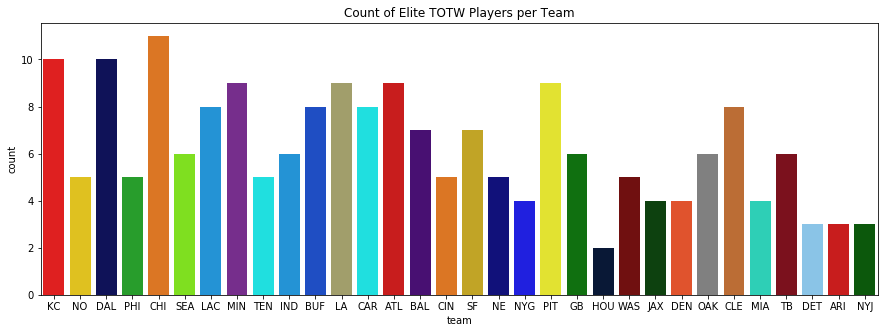

In [43]:
plt.figure(figsize=(15, 5))
sns.countplot(elites['team'], palette=team_palette);
plt.title('Count of Elite TOTW Players per Team');

### Gold

In [8]:
#golds = get_players('g', n_pages=gold_pages)
#golds.to_csv(f'totw_gold_{date}.csv')

In [11]:
golds = pd.read_csv('totw_gold_jan2.csv')
df = pd.concat([elites, golds])

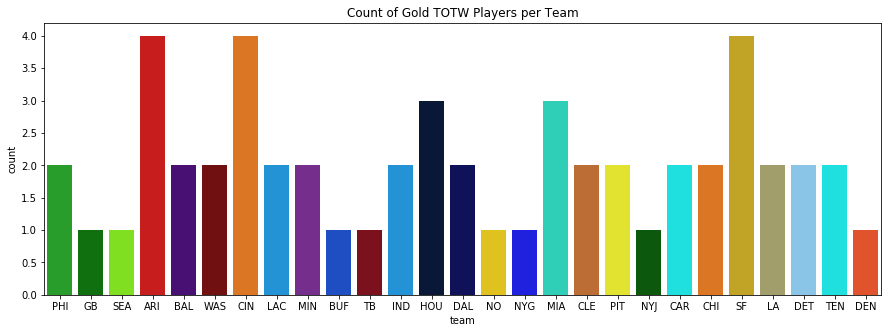

In [44]:
plt.figure(figsize=(15, 5))
sns.countplot(golds['team'], palette=team_palette);
plt.title('Count of Gold TOTW Players per Team');

### All TOTW Players

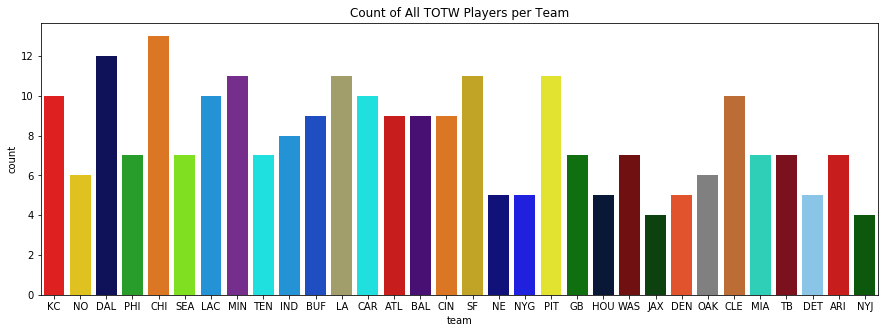

In [45]:
plt.figure(figsize=(15, 5))
sns.countplot(df['team'], palette=team_palette);
plt.title('Count of All TOTW Players per Team');

## NFL Standings

In [13]:
afc_path = '/Users/mattjohnson/PycharmProjects/MUT19/afc_standings.csv'
nfc_path = '/Users/mattjohnson/PycharmProjects/MUT19/nfc_standings.csv'
afc = pd.read_csv(afc_path)
nfc = pd.read_csv(nfc_path)
standings = pd.concat([afc, nfc])

In [14]:
#standings.sort_values('W', ascending=False)
teams = pd.read_csv('nfl_teams.csv')
teams.set_index('Name', drop=True, inplace=True)
team_dict = teams['Abbreviation'].to_dict()

standings['abbrev'] = standings['Tm'].map(team_dict)

In [15]:
#
abbrevs1 = set(df['team'].unique())
abbrevs2 = set(standings['abbrev'].unique())
print(len(abbrevs1), '-', len(abbrevs2))
abbrevs1 == abbrevs2

32 - 32


True

In [16]:
team_count_dict = df['team'].value_counts().to_dict()

In [17]:
standings['count'] = standings['abbrev'].map(team_count_dict)

In [18]:
all_df = standings[['Tm', 'W', 'PF', 'PA', 'PD', 'abbrev', 'count']]
all_df.sort_values('W', ascending=False, inplace=True)

In [19]:
def tidy(df):
    try:
        df = df[['abbrev', 'W', 'count']]
    except:
        print('xx')
        return []
    if len(df.columns) != 3:
        print('x')
        return []
    tidy = (
    df.set_index('abbrev')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
    )
    return tidy

In [20]:
tidied = tidy(all_df)

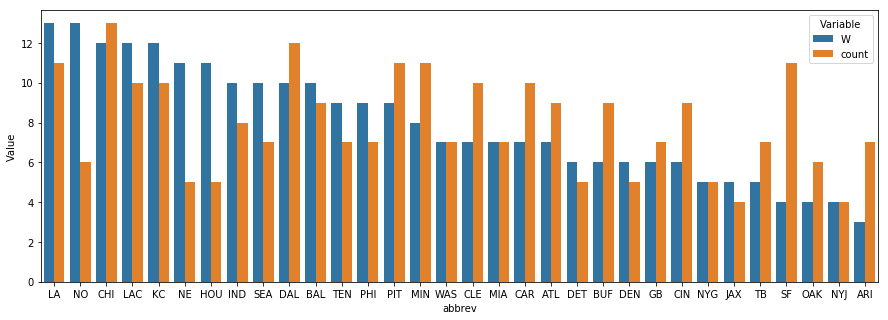

In [22]:
plt.figure(figsize=(15, 5))
sns.barplot(data=tidied, x='abbrev', y='Value', hue='Variable');

W: Wins, PF: Points For, PA: Points Against, PD: Net Points, count: number of TOTW players in season

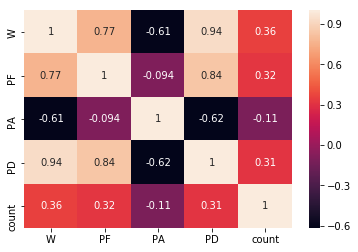

In [33]:
sns.heatmap(all_df.corr(), annot=True);

12    143
8     151
4     138
13     99
12    144
0     111
8      86
9      89
13     81
0      15
4     102
10      7
1      19
5      68
5      19
2     -78
6     -33
1    -114
9      -6
10     -9
7     -36
2    -105
14    -20
6     -24
7     -87
3     -43
11    -71
11    -68
14    -93
15   -177
3    -108
15   -200
dtype: int64